**PROBLEM STATEMENT**

The objective of this project is to build a model to predict whether a patient has diabetes or
not based on certain diagnostic measurements included in the dataset.


**Objective**

The goal of this project is to develop an accurate and reliable machine-learning model that
can predict whether a patient has diabetes or not. By predicting diabetes early, patients can
receive early intervention and avoid complications associated with the disease.
Deploy the best model using gradio

**Data Dictionary**

The dataset consists of medical data for 768 patients. It includes the following features:

Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skinfold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1) indicating whether the patient has diabetes or not

In [ ]:
## Mounting the drive to colab file
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
##Loading diabtetes data 
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#path='/content/drive/My Drive/Colab Notebooks/downloads/diabetes.csv'
#dat1 = pd.read_csv(path)

In [ ]:
# Alternate way to load the data
data = pd.read_csv("/content/diabetes.csv")

# EXPLORATORY DATA ANALYSIS

In [ ]:
data.shape

(768, 9)

- The data has 9 columns and 768 rows

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- Most of the patients have had 3 pregnancies in their lifetime. The highest number of pregnancies by a patient is 17. 
- The mean age of the patients is 33 years, youngest and oldest being 21 and 81 respectively. 
- The mean BloodPressure for these patients is 69 mm Hg. For a mean age of 33 years, this is within the normal diastolic Range. For ages 14-18 years, 50-88 mm Hg is normal. For ages 19-40 years, 60-80 mm Hg is normal. For ages 41-60, 70-90 mm Hg is normal. Lastly, for aages 61 and olde,the normal mm Hg is between 70-90. In this case, we have 122 mm Hg has the maximum BloodPressure. This means that there are some patients who have high blood pressure than normal.
- The mean BMI is 31, which is in the obese category. The top quarter of the population fall above a BMI of 36.6 (75%). 

In [ ]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- There are 500 non-diabetic patients and 268 diabetic patients

In [ ]:
data.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


- The mean pregnancies for non-diabetic patients is 3 while that of diabetic is approximatetly 4.
- It is also important to note that the mean insulin levels and BMI for diabtetic individuals are higher than for non-diabetic patients.
- Older people are also more susceptible to diabetes. 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There are no missing values in the data.
- All the columns are in numerical form.

In [ ]:
##Checking for sum of null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We should notice that from the descriptive statistics table, there are important variables with minimum values of zero. This include glucose level, bloodpressurem skin thickness, insulin and BMI. It is not normal to report these variables with values of zero. 

In [ ]:
## Lets check how many columns have zero values
(data[data.columns]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

All columns with zero values, except pregnancies, and Outcome can be interpreted as having missing values. We will replace zero values with median.

In [ ]:
Var = ["Glucose","BloodPressure","Insulin","SkinThickness","BMI"] ## Defining the variables 
for i in Var:
  data[i].replace({0:data[i].median()},inplace=True)

In [ ]:
(data[data.columns]==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Checking for outliers**

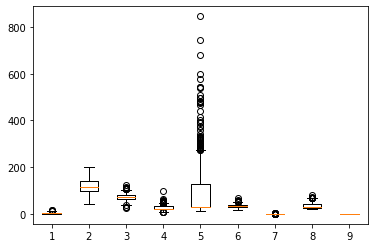

In [ ]:
plt.boxplot(data);

- The plot above shows that there are a lot of outliers in our data. We will treat the outliers before we proceed.

**Treating the outliers**

In [ ]:
#Defining the outlier function
def Outlier_treatment():
  variables =["Pregnancies","BloodPressure","DiabetesPedigreeFunction","BMI","Glucose","SkinThickness","Age","Insulin"]
  for i in variables:
        x = np.quantile(data[i],[0.25,0.75])
        iqr = x[1]-x[0]  #Interquartile range
        uw = x[1]+1.5*iqr # Upper quartile
        lw = x[0]-1.5*iqr # Lower quartile
        data[i]  = np.where(data[i]>uw,uw,(np.where(data[i]<lw,lw,data[i])))

Outlier_treatment()

**Checking the boxplot after outlier treatment**

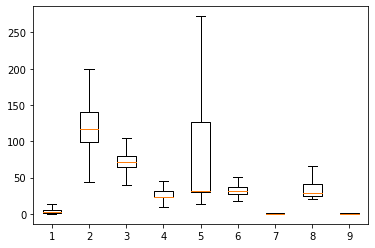

In [ ]:
plt.boxplot(data);

- All the outliers have been treated.

# **Univariate** **Analysis**

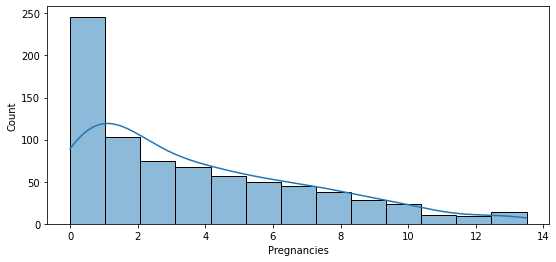

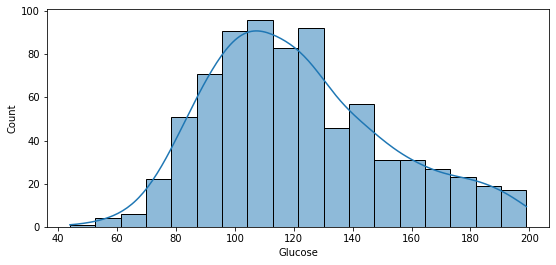

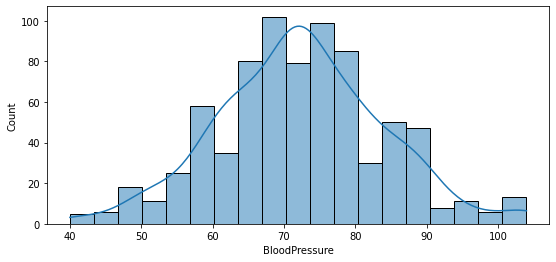

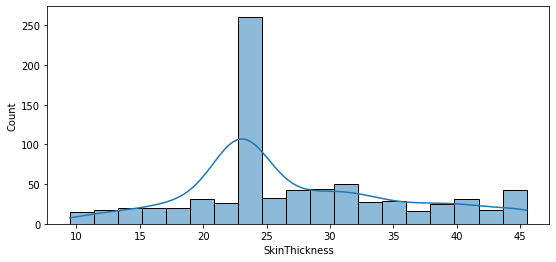

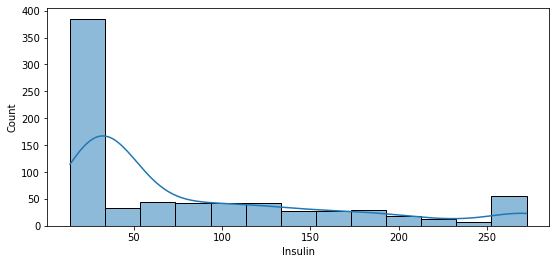

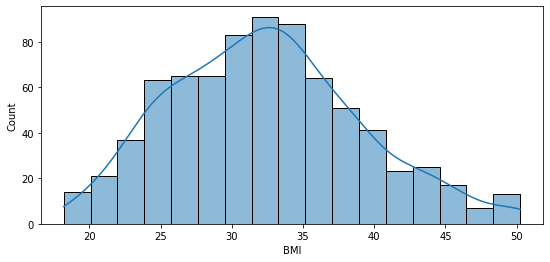

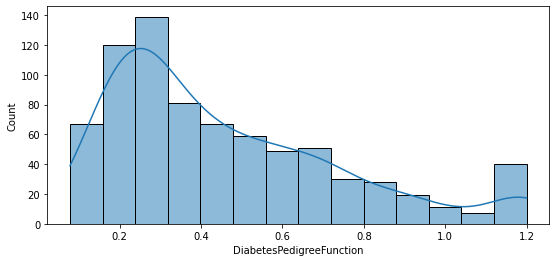

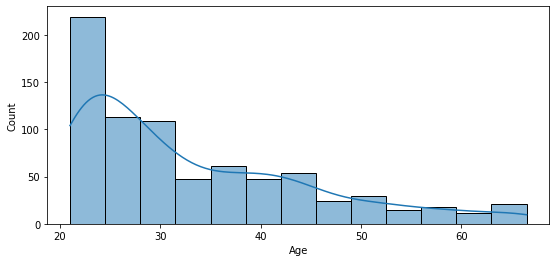

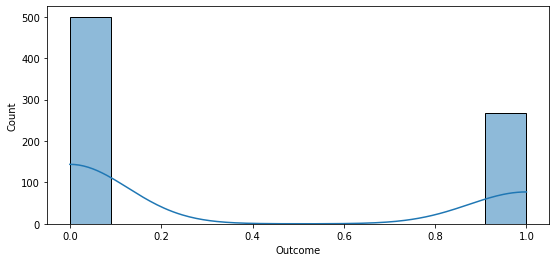

In [ ]:
import seaborn as sns
for i in data.columns:
  plt.figure(figsize=(9,4))
  sns.histplot(data=data,x=i,kde=True)
  plt.show()

**Observations**
- Pregnancies, Insulin, DiabetesPedegree Function and Age are rightly skewed. 
- Glucose, BloodPressure and BMI appears to have a slighlt normal distribution.


**Barplots**

<Axes: xlabel='Outcome', ylabel='Insulin'>

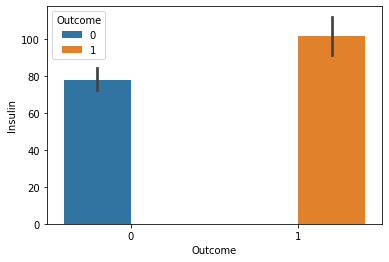

In [ ]:
sns.barplot(x="Outcome",y="Insulin",data=data,hue="Outcome")

- Patients who are diabetic appears to have a higher insulin level as compared to non-diabetic patients. 
- There are also outliers in the data

<Axes: xlabel='Outcome', ylabel='Glucose'>

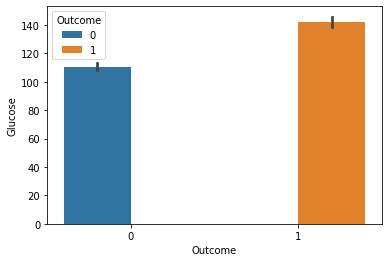

In [ ]:
sns.barplot(x="Outcome",y="Glucose",data=data,hue="Outcome")

- Patients who are diabetic appears to have a higher Glucose level as compared to non-diabetic patients

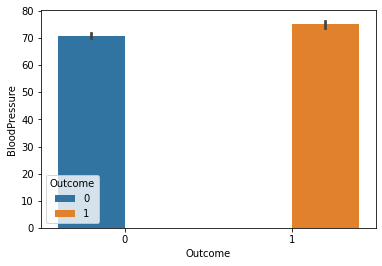

In [ ]:
sns.barplot(x="Outcome",y="BloodPressure",data=data,hue="Outcome");

- BloodPressure levels for diabetic and non-diabetic patients has no huge difference.

**Histplot in relation to other variables**

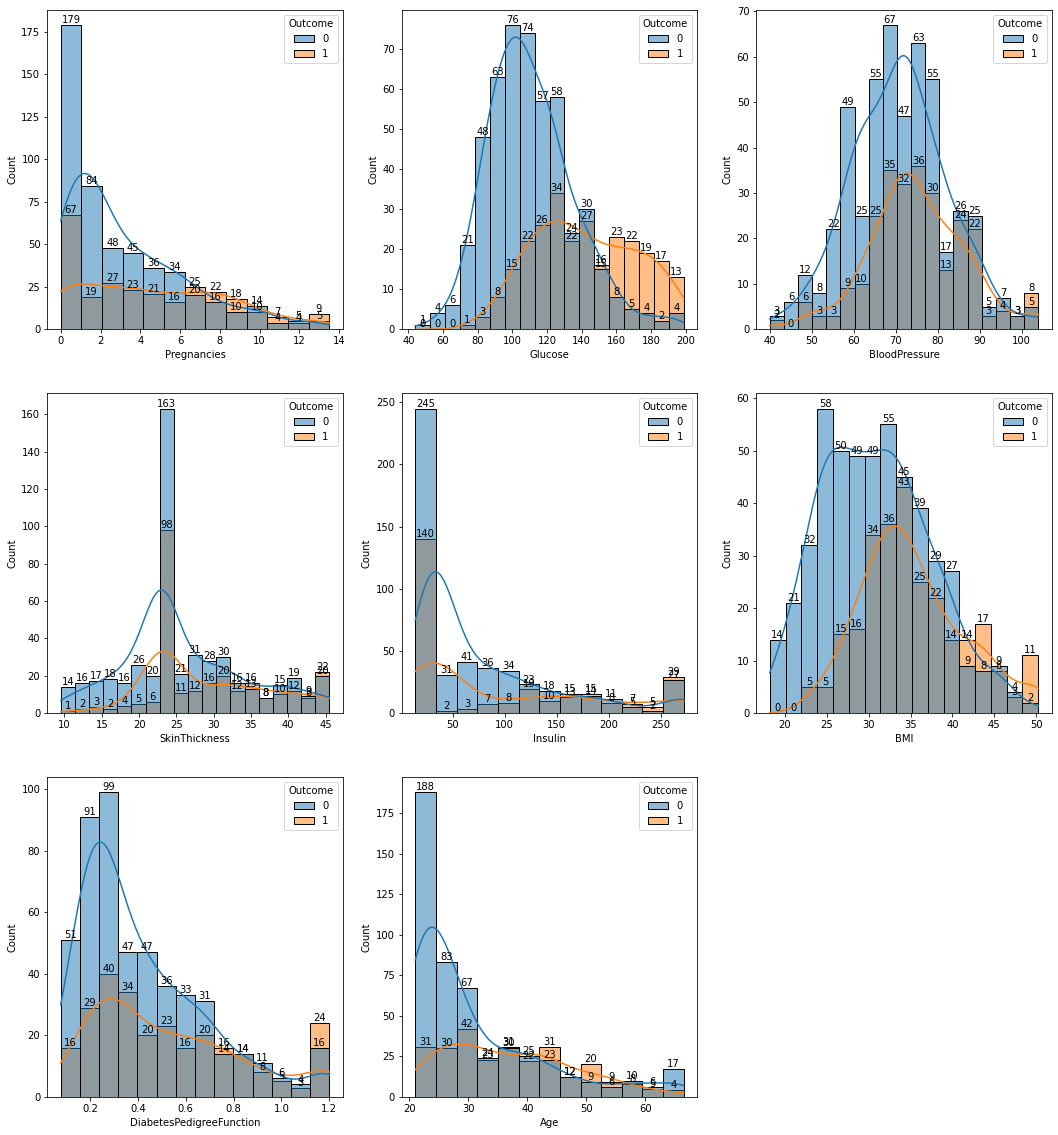

In [ ]:
pno = 1
plt.figure(figsize=(18,20))
for i in data.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            ax = sns.histplot(data = data , x = i , hue = data.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in ax.containers: ## Setting labels on the top of the bars
                ax.bar_label(i,)

**Observations**
- The risk of being diabetic increases as the number of pregnancies increases.
- Patients with Glucose level above 150 are susceptible to diabetes.
- The risk of diabetes increases as the bloodpressure increases. The same cna be concluded for SkinThickness, Age, Insulin and BMI above 30. 


**Heatmap**

<Axes: >

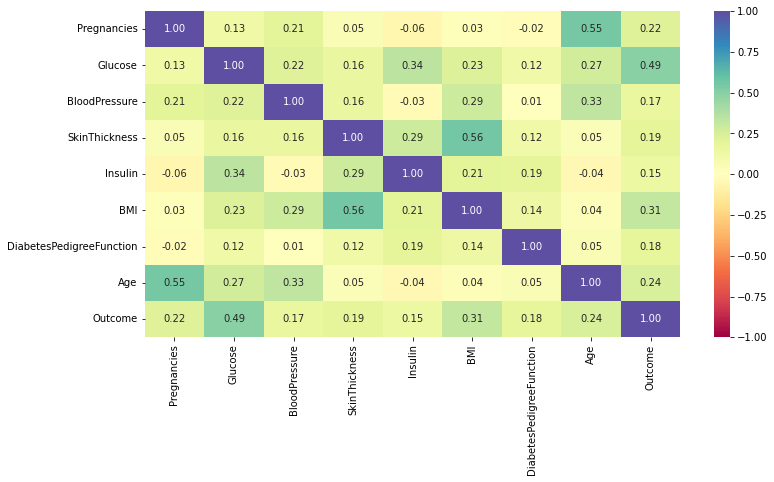

In [ ]:
# Lets look at the correlation between variables
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,fmt=".2f",vmin=-1,vmax=1,cmap="Spectral")

In [ ]:
data.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.313030
Age                         0.242702
Pregnancies                 0.220392
SkinThickness               0.191333
DiabetesPedigreeFunction    0.184969
BloodPressure               0.168971
Insulin                     0.147295
Name: Outcome, dtype: float64

- Age is positively correlated with number of pregnancies (0.54). This is attributed to the fact that, the number of children increases as people get old.
- Glucose levels and the outcome is also positively correlated (0.47). As we have noticed in previous visualizations, diabetic patients tend to have higher glucose levels.
- SkinThickkness is positively correlated with Insulin(0.44) and BMI (0.39)
- Glucose is the main factor that increases the risk of diabetes, followed by BMI and Age.


## **Feature Engineering**

Feature engineering allows us to introduce new variables that seem important ad would improve our model. For example, in the case of BMI, we can categorize data into underweight, normal, overweight, obese etc.
We will do the same for Insulin and Glucose. 

In [ ]:
## Creating new variables for Variable "BMI"
NBMI = pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"],dtype="category")
data["NBMI"]=NBMI
data.loc[data["BMI"]<18.5, "NBMI"]=NBMI[0]
data.loc[(data["BMI"]>18.5) & (data["BMI"]<=24.9), "NBMI"]=NBMI[1]
data.loc[(data["BMI"]>24.9) & (data["BMI"]<=29.9), "NBMI"]=NBMI[2]
data.loc[(data["BMI"]>29.9) & (data["BMI"]<=34.9), "NBMI"]=NBMI[3]
data.loc[(data["BMI"]>34.9) & (data["BMI"]<=39.9), "NBMI"]=NBMI[4]
data.loc[data["BMI"]>39.9, "NBMI"]=NBMI[5]

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NBMI
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3


In [ ]:
## Creating new variables for Variable "Glucose" using a function
NGlucose = pd.Series(["Low", "Normal", "Early Diabetes", "High"], dtype = "category")
data["NGlucose"] = NGlucose
data.loc[data["Glucose"] <= 70, "NGlucose"] = NGlucose[0]
data.loc[(data["Glucose"] > 70) & (data["Glucose"] <= 99), "NGlucose"] = NGlucose[1]
data.loc[(data["Glucose"] > 99) & (data["Glucose"] <= 126), "NGlucose"] = NGlucose[2]
data.loc[data["Glucose"] > 126 ,"NGlucose"] = NGlucose[3]


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NBMI,NGlucose
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1,High
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight,Normal
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1,Normal,High
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,High


In [ ]:
## Creating new variables for Variable "Insulin" using a function
def new_insulin(row):
  if row ["Insulin"]>=16 and row ["Insulin"] <= 166:
    return "Normal"
  else:
    return "Abnormal"

In [ ]:
#Assigning the results to new variable in the dataframe
data = data.assign(NewInsulin=data.apply(new_insulin, axis=1))
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NBMI,NGlucose,NewInsulin
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1,High,Normal
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1,Normal,High,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,High,Abnormal


**Assigning dummies to the new variables**

In [ ]:
data =pd.get_dummies(data,columns= ["NBMI","NGlucose","NewInsulin"], drop_first=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NBMI_Obesity 1,NBMI_Obesity 2,NBMI_Obesity 3,NBMI_Overweight,NBMI_Underweight,NGlucose_High,NGlucose_Low,NGlucose_Normal,NewInsulin_Normal
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,1,0,0,0,0,1,0,0,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,0,0,0,1,0,0,0,1,1
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32.0,1,0,0,0,0,0,1,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,0,0,0,1,0,0,0,1,1
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,0,0,1,0,0,1,0,0,0


**MODELLING**

In [ ]:
# Defing predictor vairables and the target variable
X = data.drop(columns="Outcome",axis= 1)
y= data["Outcome"]

In [ ]:
cols = X.columns
index = X.index

**Standardization using RobustScaler**

In [ ]:
RS = RobustScaler().fit(X)
X= RS.transform(X)
X= pd.DataFrame(X, columns= cols, index= index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NBMI_Obesity 1,NBMI_Obesity 2,NBMI_Obesity 3,NBMI_Overweight,NBMI_Underweight,NGlucose_High,NGlucose_Low,NGlucose_Normal,NewInsulin_Normal
0,0.6,0.765432,0.000,1.333333,-0.007752,0.175824,0.665359,1.235294,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.4,-0.790123,-0.375,0.666667,-0.007752,-0.593407,-0.056209,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.629630,-0.500,0.000000,-0.007752,-0.956044,0.783007,0.176471,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.4,-0.691358,-0.375,0.000000,0.648579,-0.428571,-0.537255,-0.470588,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.6,0.493827,-2.000,1.333333,1.413437,1.219780,2.163399,0.235294,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0


In [ ]:
# Splitting the dataframe into training and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)
X_train.shape,X_test.shape, y_test.shape

((691, 17), (77, 17), (77,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("svc",SVC (random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "f1_macro"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_test, model.predict(X_test), average="macro")
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Logistic regression: 73.13209261548496
Bagging: 71.45273183291788
Random forest: 71.52352673972572
GBM: 70.82469577989139
Adaboost: 70.78905380431569
Xgboost: 69.82790486774428
dtree: 64.59802947389622
svc: 71.51646654708651

Validation Performance:

Logistic regression: 0.7148148148148149
Bagging: 0.7842331402951616
Random forest: 0.7595959595959596
GBM: 0.7878787878787878
Adaboost: 0.6979263964132262
Xgboost: 0.7595959595959596
dtree: 0.6862962962962963
svc: 0.7801256424900057


- We will use Logistic regression, Adaboost,GBM, Random Forest, DecisionTree and SVC

**Logistic Regression**

In [ ]:
#Fitting the data into our model
lr= LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

In [ ]:
##prediction
y_pred_lr= lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        50
           1       0.63      0.63      0.63        27

    accuracy                           0.74        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.74      0.74      0.74        77



In [ ]:
lr_score = accuracy_score(y_test,y_pred_lr)
lr_score

0.7402597402597403

The accuracy score for LogisticRegression model is 74%

In [ ]:
print(confusion_matrix(y_test,y_pred_lr))

[[40 10]
 [10 17]]


**AdaBoost Classifier**

In [ ]:
#Fitting and predicting the data
ad = AdaBoostClassifier(random_state=123)
ad.fit(X_train,y_train)
y_pred_ad = ad.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        50
           1       0.62      0.59      0.60        27

    accuracy                           0.73        77
   macro avg       0.70      0.70      0.70        77
weighted avg       0.73      0.73      0.73        77



In [ ]:
ad_score = accuracy_score(y_test,y_pred_ad)
ad_score

0.7272727272727273

AdaBoost model has an accuracy score of 73%

**GBM (Gradient Boosting Classifier)**

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        50
           1       0.71      0.74      0.73        27

    accuracy                           0.81        77
   macro avg       0.79      0.79      0.79        77
weighted avg       0.81      0.81      0.81        77



In [ ]:
gbm_score = accuracy_score(y_test,y_pred_gbm)
gbm_score

0.8051948051948052

- GBM has an accuracy score of 81%

**Decision Tree Classifier**

In [ ]:
# Fitting and predicting the data
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        50
           1       0.59      0.59      0.59        27

    accuracy                           0.71        77
   macro avg       0.69      0.69      0.69        77
weighted avg       0.71      0.71      0.71        77



In [ ]:
dt_score = accuracy_score(y_test,y_pred_dt)
dt_score

0.7142857142857143

-Decision Tree has an accuracy score of 68%.

**Support Vector Classifier**

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        50
           1       0.75      0.67      0.71        27

    accuracy                           0.81        77
   macro avg       0.79      0.77      0.78        77
weighted avg       0.80      0.81      0.80        77



In [ ]:
svc_score = accuracy_score(y_test,y_pred_svc)
svc_score

0.8051948051948052

- SVC has an accuracy score of 81%.

**Random Forest Classifier**

In [ ]:
#Fitting and predicting the data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        50
           1       0.69      0.74      0.71        27

    accuracy                           0.79        77
   macro avg       0.77      0.78      0.78        77
weighted avg       0.80      0.79      0.79        77



In [ ]:
rf_score = accuracy_score(y_test,y_pred_rf)
rf_score

0.7922077922077922

- Random Forest has an accuracy score of 81%.

**Plotting Accuracy Scores of all ML Algorithms**

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'GBM', 'AdaBoost','SVC', 'Decision Tree']
scores = [lr_score, rf_score,gbm_score,ad_score,svc_score,dt_score]

models = pd.DataFrame({'Model' : models, 'Score' : scores})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,GBM,0.805195
4,SVC,0.805195
1,Random Forest,0.792208
0,Logistic Regression,0.740260
3,AdaBoost,0.727273
5,Decision Tree,0.714286


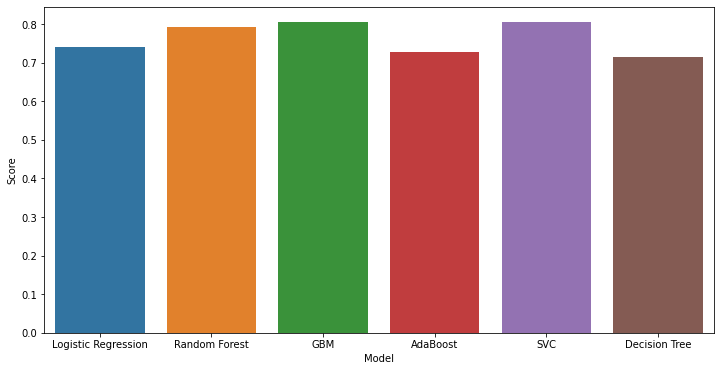

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

- GBM, Random Forest and SVC have the highest accuracy score(81%). We will use Random Forest for deployment. 

**Feature Importance for Random Forest**


In [ ]:
rf.feature_importances_ #Array of feature importances

array([7.34652680e-02, 2.02526947e-01, 8.19360568e-02, 6.65751797e-02,
       6.23877344e-02, 1.31498968e-01, 1.13532901e-01, 1.15470509e-01,
       1.17377154e-02, 1.16578130e-02, 1.03292115e-02, 1.30567876e-02,
       1.99230557e-06, 6.17759464e-02, 2.19773993e-03, 3.14077256e-02,
       1.04415041e-02])

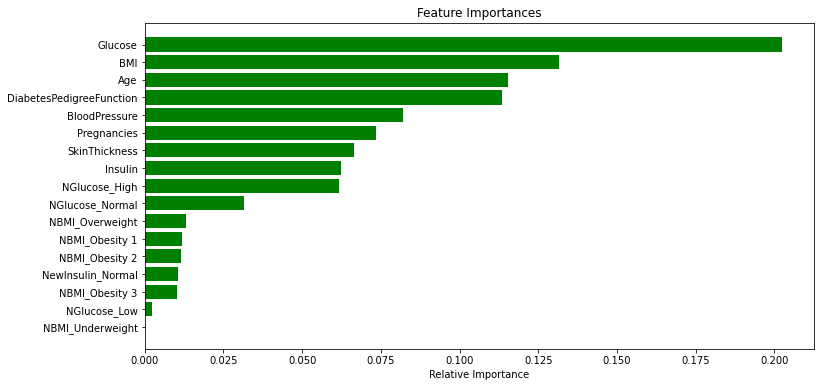

In [ ]:
 #Plotting a bargraph of feature importances
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="g", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


- Based on the above chart, Glucose,BMI, and Age are the three most important features in Random Forest model. This is follows our previous analysis on the data. 

**Building the final model**

In [ ]:
X = data.drop(columns="Outcome")
Y = data["Outcome"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.1, random_state=42,stratify=Y)

In [ ]:
from sklearn.pipeline import Pipeline

**Pipeline** 

In [ ]:
pipeline_rf = Pipeline([("RS",RobustScaler()),
                        "rf",RandomForestClassifier()])

In [ ]:
import pickle
with open("Diabetes_Prediction_Model.pkl", "wb") as f:
  pickle.dump(pipeline_rf, f)  

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 KB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 K

In [ ]:
import gradio as gr
def make_prediction(Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin,BMI,DiabetesPedigreeFunction,Age):
    with open("Diabetes_Prediction_Model.pkl", "rb") as f:
        clf  = pickle.load(f)
        input_data = pd.DataFrame([[Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin,BMI,DiabetesPedigreeFunction,Age]],
                                  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
        preds = clf.predict(input_data)[0]
    if preds == 1:
            return "Diabetic"
    return "Non_Diabetic"

    # Define the input fields for the model
Pregnancies = gr.inputs.Number(label="Pregnancies")
Glucose = gr.inputs.Number(label="Glucose")
BloodPressure = gr.inputs.Number(label="BloodPressure")
SkinThickness = gr.inputs.Number(label="SkinThickness")
Insulin = gr.inputs.Number(label="Insulin")
BMI = gr.inputs.Number(label='BMI')
DiabetesPedigreeFunction = gr.inputs.Number(label='DiabetesPedigreeFunction')
Age = gr.inputs.Number(label='Age')


# We create the output
output = gr.Textbox()

app = gr.Interface(fn = make_prediction, inputs=[Pregnancies,Glucose, BloodPressure, SkinThickness, Insulin,BMI,DiabetesPedigreeFunction,Age],outputs=output)
app.launch(show_error=True, debug=True, inline=False, share=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://0b915e0ca37ef4fe59.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/gradio/routes.py", line 394, in run_predict
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.9/dist-packages/gradio/blocks.py", line 1075, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.9/dist-packages/gradio/blocks.py", line 884, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.9/dist-packages/anyio/to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.9/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.9/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-69-67caedaa6f5b>", line 7, in make_prediction
    preds = clf.predict(input_data)[0]
  File "/usr/local/lib/p